In [4]:
import pandas as pd
import os

# Initialize an empty list to hold dataframes
dataframes = []

# Folder path where the files are located
folder_path = 'c:/Users/siroh/Downloads/krunch dataset'

# List of files to be merged
files = ['loc1_Apr-23.xlsx', 'loc1_Aug-23.xlsx', 'loc1_Dec-23.xlsx', 'loc1_Feb-24.xlsx', 'loc1_Jan-24.xlsx', 
         'loc1_Jul-23.xlsx', 'loc1_Jun-23.xlsx', 'loc1_Mar-24.xlsx', 'loc1_May-23.xlsx', 'loc1_Nov-23.xlsx', 
         'loc1_Oct-23.xlsx', 'loc1_Sep-23.xlsx', 'loc2_Apr-23.xlsx', 'loc2_Aug-23.xlsx', 'loc2_Dec-23.xlsx', 
         'loc2_Feb-24.xlsx', 'loc2_Jan-24.xlsx', 'loc2_Jul-23.xlsx', 'loc2_Jun-23.xlsx', 'loc2_Mar-24.xlsx', 
         'loc2_May-23.xlsx', 'loc2_Nov-23.xlsx', 'loc2_Oct-23.xlsx', 'loc2_Sep-23.xlsx']

# Loop through each file and read it into a dataframe
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
merged_data = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the merged dataframe
merged_data.head()

icode  Mment  IndentQty  ProductionQty  DespatchQty  BalanceQty  \
0  21613    KGS      23831              0            0       23831   
1   8858  PICES      18565              0            0       18565   
2   2188    NOS       8785           1666         1627        7158   
3   2189    NOS       7629           1473         1490        6139   
4  22219    NOS       6302              0         2171        4131   

   IndentValue  ProductionValue  DespatchValue  BalanceValue  sno  
0     23831000                0              0      23831000    1  
1       377612                0              0        377612    2  
2       509881            96695          94431        415450    3  
3       442787            85493          86480        356308    4  
4       534536                0         184144        350391    5

In [5]:
merged_data.shape

(12347, 11)

Data Overview

    icode: A unique item code identifying each product.
    Mment: Unit of measurement (e.g., KGS, PICES, NOS).
    IndentQty: Quantity requested or required (indent quantity).
    ProductionQty: Quantity produced during the period.
    DespatchQty: Quantity dispatched or shipped to locations.
    BalanceQty: Remaining quantity after dispatch and production adjustments.
    IndentValue: Monetary value of the requested quantity.
    ProductionValue: Monetary value of the produced quantity.
    DespatchValue: Monetary value of the dispatched quantity.
    BalanceValue: Monetary value of the remaining balance quantity.
    sno: Serial number for tracking rows.

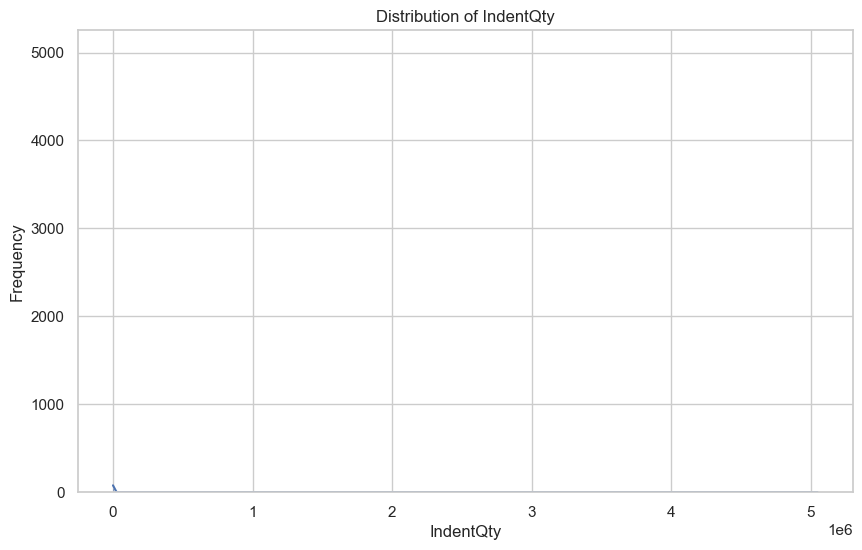

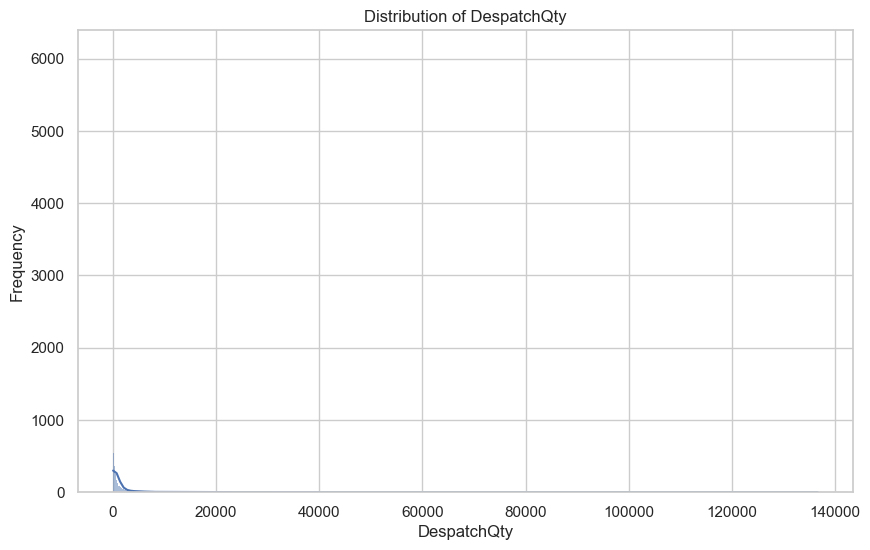

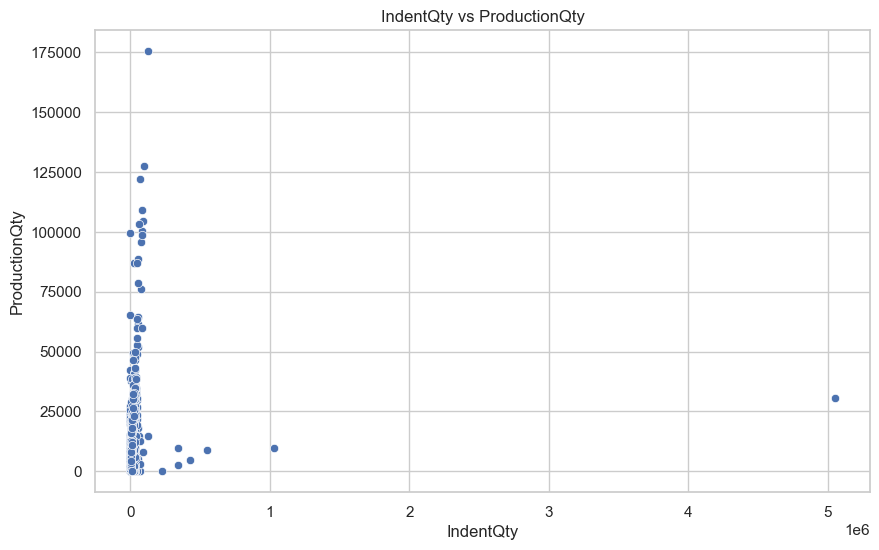

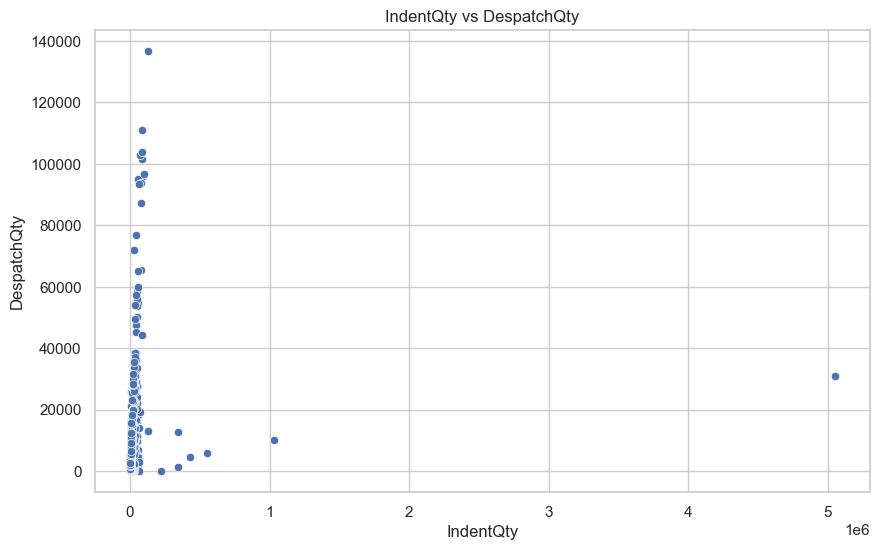

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of IndentQty
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['IndentQty'], kde=True)
plt.title('Distribution of IndentQty')
plt.xlabel('IndentQty')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of ProductionQty
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['ProductionQty'], kde=True)
plt.title('Distribution of ProductionQty')
plt.xlabel('ProductionQty')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of DespatchQty
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['DespatchQty'], kde=True)
plt.title('Distribution of DespatchQty')
plt.xlabel('DespatchQty')
plt.ylabel('Frequency')
plt.show()

# Plot the relationship between IndentQty and ProductionQty
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IndentQty', y='ProductionQty', data=merged_data)
plt.title('IndentQty vs ProductionQty')
plt.xlabel('IndentQty')
plt.ylabel('ProductionQty')
plt.show()

# Plot the relationship between IndentQty and DespatchQty
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IndentQty', y='DespatchQty', data=merged_data)
plt.title('IndentQty vs DespatchQty')
plt.xlabel('IndentQty')
plt.ylabel('DespatchQty')
plt.show()

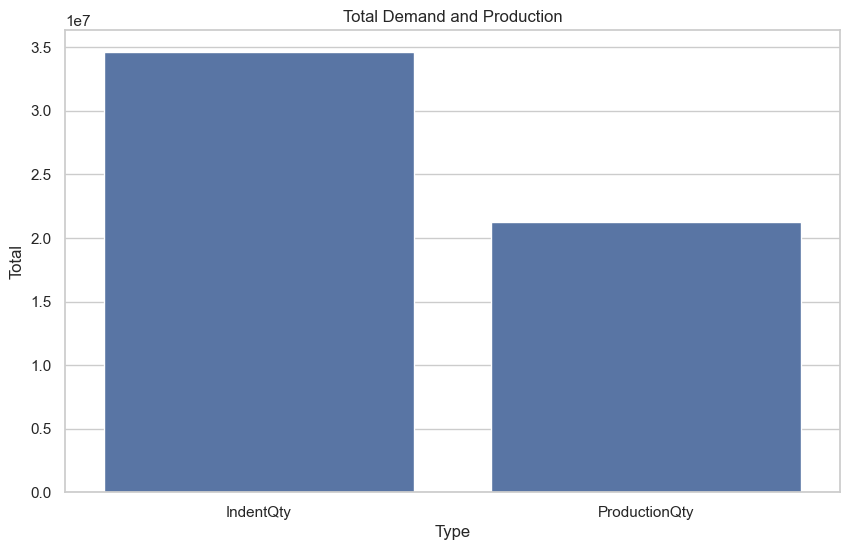

In [7]:
# Calculate the total demand and production for type
demand_production = merged_data[['IndentQty', 'ProductionQty']].sum().reset_index()

# Rename the columns    
demand_production.columns = ['Type', 'Total']

# Plot the total demand and production
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Total', data=demand_production)
plt.title('Total Demand and Production')
plt.ylabel('Total')
plt.show()

Unmet Demand: The gap between 35 million units demanded and 20 million units produced shows that approximately 15 million units of demand were not met.

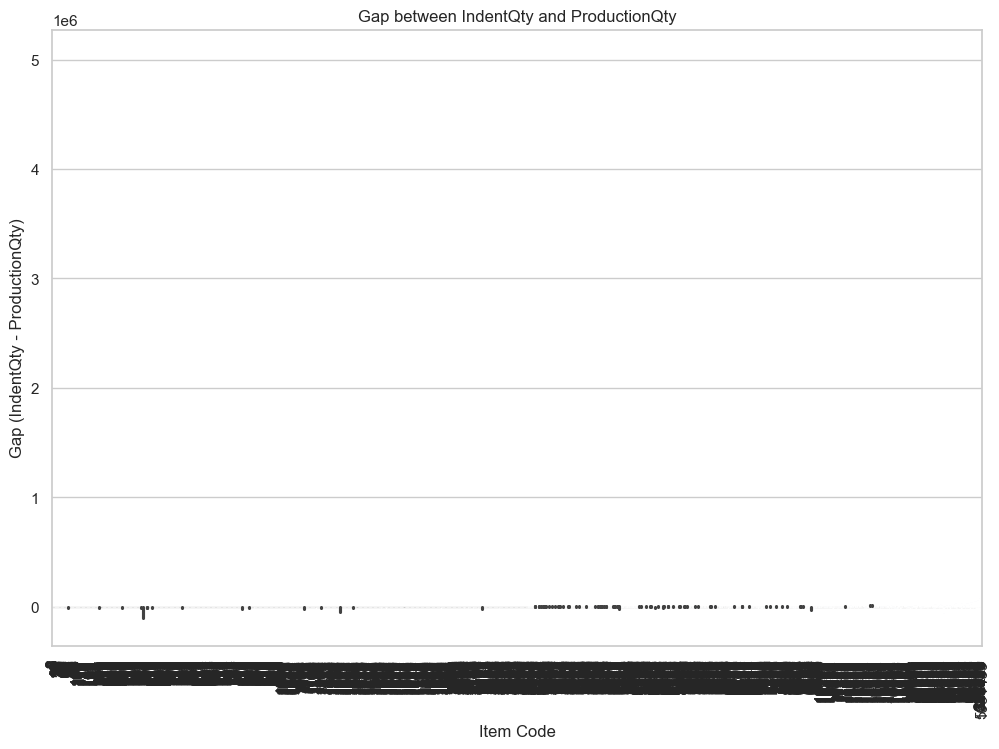

In [8]:
# Calculate the gap between IndentQty and ProductionQty
merged_data['Gap'] = merged_data['IndentQty'] - merged_data['ProductionQty']

# Plot the relationship between IndentQty and Gap
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='IndentQty', y='Gap', data=merged_data)
# plt.title('IndentQty vs Gap')
# plt.xlabel('IndentQty')
# plt.ylabel('Gap (IndentQty - ProductionQty)')
# plt.show()

# Plot the gap for each item
plt.figure(figsize=(12, 8))
sns.barplot(x='IndentQty', y='Gap', data=merged_data)
plt.title('Gap between IndentQty and ProductionQty')
plt.xlabel('Item Code')
plt.ylabel('Gap (IndentQty - ProductionQty)')
plt.xticks(rotation=90)
plt.show()

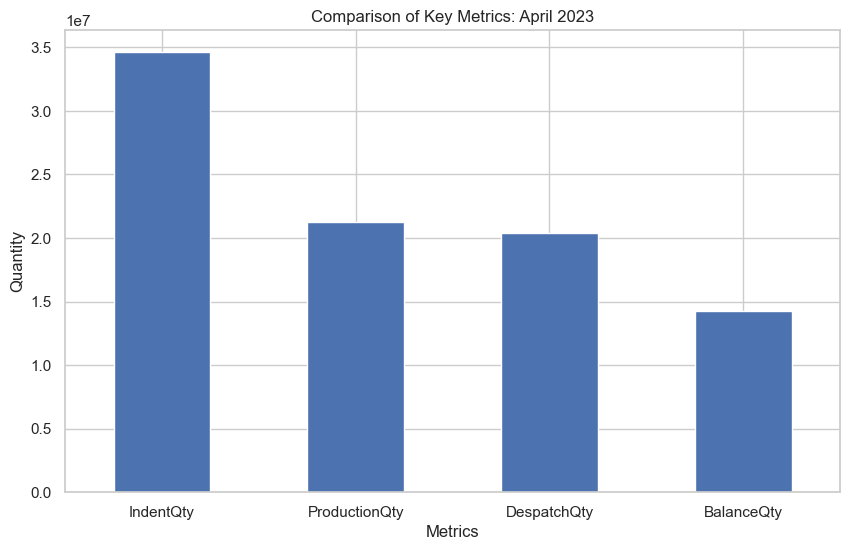

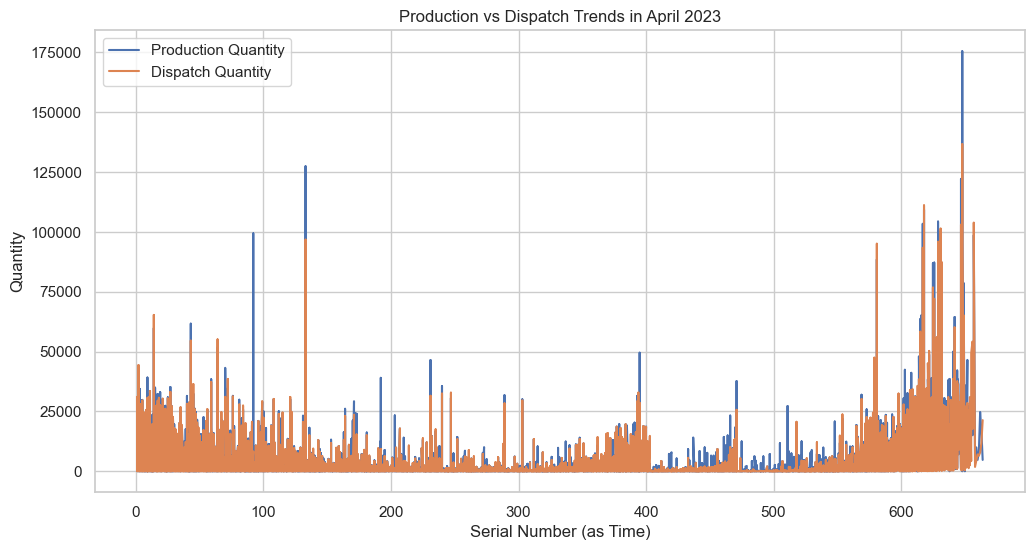

(13350938,
    icode  UnmetDemand
 0  21613        23831
 1   8858        18565
 2   2188         7119
 3   2189         6156
 4  22219         6302)

In [9]:

# Summarize key metrics from the dataset
summary = merged_data[['IndentQty', 'ProductionQty', 'DespatchQty', 'BalanceQty']].sum()

# Plotting the overall comparison between key metrics
plt.figure(figsize=(10, 6))
summary.plot(kind='bar')
plt.title('Comparison of Key Metrics: April 2023')
plt.xlabel('Metrics')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.show()

# Time-based trends: Check if data includes time-series information (e.g., serial order)
data_sorted = merged_data.sort_values(by='sno')  # Sort by serial number as a proxy for time
plt.figure(figsize=(12, 6))

# Plot production and dispatch trends
plt.plot(data_sorted['sno'], data_sorted['ProductionQty'], label='Production Quantity')
plt.plot(data_sorted['sno'], data_sorted['DespatchQty'], label='Dispatch Quantity')
plt.title('Production vs Dispatch Trends in April 2023')
plt.xlabel('Serial Number (as Time)')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Calculate unmet demand
merged_data['UnmetDemand'] = merged_data['IndentQty'] - merged_data['ProductionQty']
unmet_demand_total = merged_data['UnmetDemand'].sum()

unmet_demand_total, merged_data[['icode', 'UnmetDemand']].head()


Total Unmet Demand:

    13,350,938 units indicate a substantial shortfall between what was requested and what was produced. This points to either capacity issues, forecasting errors, or supply chain bottlenecks across multiple products

Top 5 Products with Highest Unmet Demand:

Product Code (icode)	Unmet Demand
21613	                23,831 units
8858	                18,565 units
2188	                7,119 units
2189	                6,156 units
22219	                6,302 units

Insights from the Top 5 Products

    Product 21613:
        This product has the highest unmet demand with 23,831 units not produced. It should be prioritized to investigate production capacity or raw material issues.

    Product 8858:
        Similarly, 18,565 units were requested but not produced, indicating a significant gap.

    Patterns in Product Codes:
        The top products with the highest unmet demand seem to cluster within specific product codes (possibly indicating product category or seasonal demand patterns).



Top Products with Highest Unmet Demand:
       icode Mment  IndentQty  ProductionQty  DespatchQty  BalanceQty  \
5399   20699   NOS    5048163          30587        31092     5017071   
11730  40661   NOS    1031439           9872        10154     1021285   
11731    256   NOS     548659           8958         5968      542691   
9128     242   KGS     426420           4460         4494      421926   
11073   1059   KGS     342236           2403         1207      341028   
8497   22961   NOS     344690           9760        12842      331848   
11074  40410   KGS     224689            215          117      224572   
10409   8470   NOS     125437          14502        13016      112421   
10410    402   NOS      88934           7967        44361       44573   
6017   23731   NOS      66821              0          200       66621   

       IndentValue  ProductionValue  DespatchValue  BalanceValue  sno  \
5399     563425472          3413815        3470178     559955294    1   
11730     

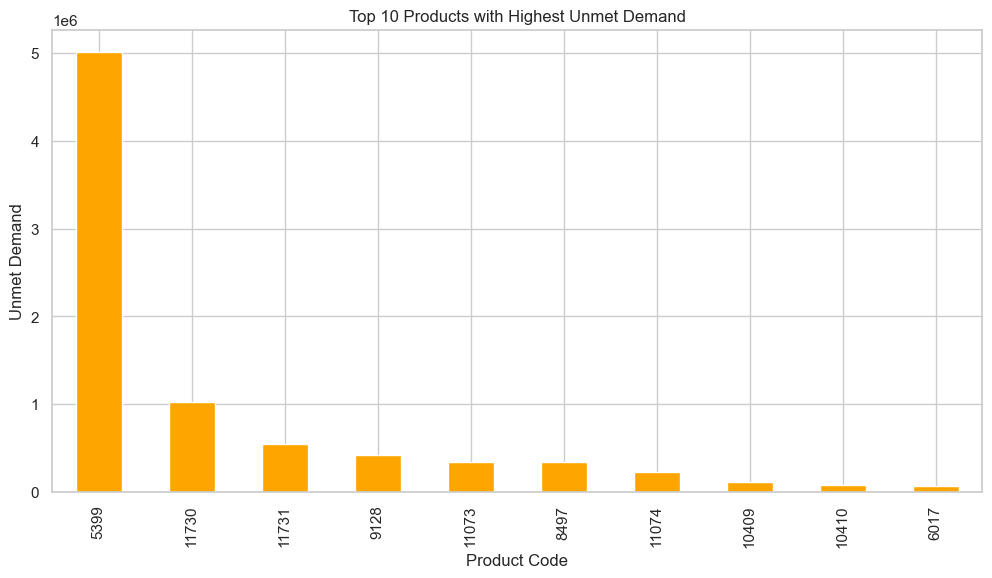

<Figure size 1200x600 with 0 Axes>

In [10]:
# Displaying the top products with highest unmet demand and dispatch inefficiencies

# Calculate unmet demand for each product
merged_data['UnmetDemand'] = merged_data['IndentQty'] - merged_data['ProductionQty']

# Identify top products with highest unmet demand
top_unmet_demand = merged_data.nlargest(10, 'UnmetDemand')

# Identify products with highest dispatch inefficiencies
high_inefficiency_products = merged_data[merged_data['ProductionQty'] > merged_data['DespatchQty']].nlargest(10, 'ProductionQty')

# Printing top products with the highest unmet demand
print("Top Products with Highest Unmet Demand:")
print(top_unmet_demand)

print("\nProducts with Highest Dispatch Inefficiencies:")
print(high_inefficiency_products)

# Plotting top 10 products with highest unmet demand
plt.figure(figsize=(12, 6))
top_unmet_demand['UnmetDemand'].plot(kind='bar', color='orange')
plt.title('Top 10 Products with Highest Unmet Demand')
plt.xlabel('Product Code')
plt.ylabel('Unmet Demand')
top_unmet_demand = merged_data.nlargest(10, 'UnmetDemand')

# Printing top products with the highest unmet demand
print("Top Products with Highest Unmet Demand:")
print(top_unmet_demand)

print("\nProducts with Highest Dispatch Inefficiencies:")
print(high_inefficiency_products)

# Plotting top 10 products with highest unmet demand
plt.figure(figsize=(12, 6))
# Calculate dispatch inefficiency for each product
merged_data['DispatchInefficiency'] = merged_data['ProductionQty'] - merged_data['DespatchQty']

# Identify products with highest dispatch inefficiencies
high_inefficiency_products = merged_data[merged_data['ProductionQty'] > merged_data['DespatchQty']].nlargest(10, 'DispatchInefficiency')

# Plotting top 10 products with highest dispatch inefficiencies
plt.figure(figsize=(12, 6))
high_inefficiency_products['DispatchInefficiency'].plot(kind='bar', color='red')
plt.title('Top 10 Products with Highest Dispatch Inefficiencies')
plt.xlabel('Product Code')
plt.ylabel('Dispatch Inefficiency')
plt.xticks(rotation=45)
plt.show()


Key Observations

    Product 20699 has the largest unmet demand:
        Demand: 5,048,163 units
        Production: Only 30,587 units produced
        Unmet Demand: 5,017,576 units

    Severe Shortages:
        Across all top products, there is a significant gap between demand and production.
        These products require immediate attention to address supply shortages.

    High Balance Quantities:
        The BalanceQty column shows the remaining quantity after dispatch. Products like 242 and 1059 have high balance values, suggesting that inventory might not be clearing efficiently.

    Overproduction with Insufficient Dispatch:

    Product 8562: Produced 175,520 units but dispatched only 136,671 units.
    This left 7,368 units stuck in inventory or delayed in transportation.

Product 24137 has no dispatch despite producing 99,391 units. This indicates a major logistics bottleneck.

Negative Balance Quantities:

    Some products have negative BalanceQty (e.g., 8707, 23731), suggesting there may be data inconsistencies or accounting errors where more units are dispatched than available.


Insights and Recommendations

    Production Bottlenecks:
        The top products with unmet demand indicate severe production shortfalls. You may need to:
            Increase production capacity.
            Prioritize production for high-demand products (like 20699 and 40661).

    Logistics and Dispatch Issues:
        Products with high production but low dispatch need logistical improvements. Possible actions:
            Optimize transport routes and warehouse operations.
            Investigate if there are delays in shipment or inventory management issues.

    Data Validation:
        Some products show negative balance quantities, indicating potential data entry errors or dispatch mismatches. This needs to be rectified to ensure correct inventory tracking.


In [11]:
# Investigate Production Bottlenecks by analyzing products with 100% unmet demand
# Calculate UnmetDemandPercentage
top_unmet_demand['UnmetDemandPercentage'] = (top_unmet_demand['UnmetDemand'] / top_unmet_demand['IndentQty']) * 100

bottleneck_products = top_unmet_demand[top_unmet_demand['UnmetDemandPercentage'] == 100]

# Identifying if there's any pattern in production capacity issue
# Analyze total production across all products to see if underproduction is widespread
total_production_issue = merged_data['ProductionQty'].sum() < merged_data['IndentQty'].sum()

# Extracting specific cases with no production but significant indent quantities
significant_bottlenecks = bottleneck_products[bottleneck_products['IndentQty'] > bottleneck_products['IndentQty'].mean()]

print(bottleneck_products, total_production_issue, significant_bottlenecks)

# Plotting significant bottlenecks
if not significant_bottlenecks.empty:
    plt.figure(figsize=(12, 6))
    significant_bottlenecks['UnmetDemand'].plot(kind='bar', color='blue')
    plt.title('Significant Bottlenecks (High IndentQty)')
    plt.xlabel('Product Code')
    plt.ylabel('Unmet Demand')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No significant bottlenecks found.")


      icode Mment  IndentQty  ProductionQty  DespatchQty  BalanceQty  \
6017  23731   NOS      66821              0          200       66621   

      IndentValue  ProductionValue  DespatchValue  BalanceValue  sno    Gap  \
6017      1640456                0           4910       1635546    1  66821   

      UnmetDemand  UnmetDemandPercentage  
6017        66821                  100.0   True Empty DataFrame
Columns: [icode, Mment, IndentQty, ProductionQty, DespatchQty, BalanceQty, IndentValue, ProductionValue, DespatchValue, BalanceValue, sno, Gap, UnmetDemand, UnmetDemandPercentage]
Index: []
No significant bottlenecks found.


The product 23731 (icode) shows 100% unmet demand.
This means the entire requested quantity (IndentQty) of 66,821 units was not produced at all, leading to an unmet demand of 66,821 units.

Details for Product 23731:

    IndentQty (Demand): 66,821 units
    ProductionQty: 0 units
    DespatchQty: 200 units (possibly from previous stock)
    BalanceQty: 66,621 units (remaining in inventory or backlogged)
    Gap: 66,821 units (since nothing was produced)
    Unmet Demand Percentage: 100%

This product highlights a critical production bottleneck, where demand was not met at all, and only a small amount (200 units) was dispatched, likely from old inventory.

The condition to identify significant bottlenecks filters for products with high demand (above the mean indent quantity of bottleneck products). In this case, product 23731 might have been the only product with 100% unmet demand, and its demand was likely below the mean value required for a "significant bottleneck.

Recommendations

    Investigate Product 23731:
        Explore why no production occurred despite the demand of 66,821 units.
        Possible reasons could include:
            Raw material shortages.
            Capacity constraints.
            Forecasting errors.

    Broaden the Analysis Criteria:
        If only one product with 100% unmet demand is found, consider loosening the filtering criteria to identify other potential bottlenecks.
            Example: Instead of filtering for products with demand above the mean, explore products with non-zero unmet demand to capture smaller but meaningful production shortfalls.

    Address Dispatch Issues:
        Even though 200 units were dispatched, it might be from old stock. Ensure the dispatch process aligns with production timelines to avoid such gaps.

       icode Mment  IndentQty  ProductionQty  DespatchQty  BalanceQty  \
3606   24137   NOS        382          99391            0         382   
11688     95   KGS       1309          65155         1866        -556   
11720   8562   NOS     129303         175520       136671       -7368   
10600     95   KGS       1562          39035          663         898   
6001   24578   NOS       1905          42408         5420       -3515   
10541   8562   NOS      98462         127451        96784        1678   
3988      95   KGS      10769          30303         1669        9100   
6527      95   KGS         48          27231           43           5   
11710     50   KGS       9493          38567        12562       -3069   
11193   1266   KGS       2219          25638         1531         688   

       IndentValue  ProductionValue  DespatchValue  BalanceValue  sno    Gap  \
3606        127332         33130002              0        127332   92 -99009   
11688       642958         31995558 

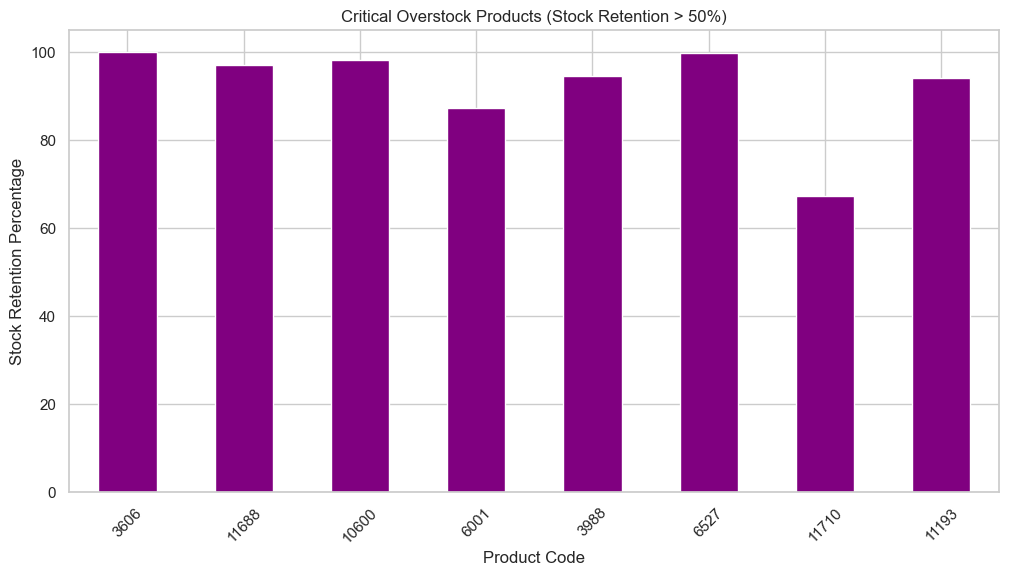

In [12]:
# Investigate logistics and dispatch inefficiencies
# Filter out the products with high dispatch inefficiencies (significant production but low dispatch)
overproduced_products = high_inefficiency_products[high_inefficiency_products['ProductionQty'] > high_inefficiency_products['DespatchQty']]

# Calculate stock retention percentage to identify how much of the production remains undispatched
overproduced_products['StockRetentionPercentage'] = (
    (overproduced_products['ProductionQty'] - overproduced_products['DespatchQty']) / overproduced_products['ProductionQty']
) * 100

# Identify key products with excessive idle stock
critical_overstock = overproduced_products[overproduced_products['StockRetentionPercentage'] > 50]

print(overproduced_products, critical_overstock)

# Plotting critical overstock products
plt.figure(figsize=(12, 6))
critical_overstock['StockRetentionPercentage'].plot(kind='bar', color='purple')
plt.title('Critical Overstock Products (Stock Retention > 50%)')
plt.xlabel('Product Code')
plt.ylabel('Stock Retention Percentage')
plt.xticks(rotation=45)
plt.show()


Product 24137:

    Produced 99,391 units but none were dispatched. This is a critical case of 100% stock retention, indicating severe logistical or storage issues.

Product Code 95:

    Appears multiple times, showing consistent overproduction with high stock retention percentages (97.14%, 99.84%). This suggests persistent bottlenecks or excess production for this product.

Product Code 24578:

    Produced 42,408 units but dispatched only 5,420 units, leaving 87.22% of stock idle.

 Insights from the Bar Plot

    The bar plot shows the stock retention percentage for each product with retention over 50%.
    The products with nearly 100% stock retention need urgent action to either improve dispatch efficiency or scale down overproduction.

Recommendations

    Investigate Products with High Stock Retention:
        Products like 24137 and 95 need to be reviewed for:
            Logistical issues (e.g., transportation delays, warehouse capacity).
            Overproduction (e.g., inaccurate demand forecasts).

    Optimize Production and Dispatch Coordination:
        Align production schedules with demand and dispatch capacity to avoid overstock.

    Implement Automated Inventory Alerts:
        Set alerts for products where stock retention exceeds a threshold, prompting corrective actions.

    Analyze Forecast Accuracy:
        Check if demand forecasts for these products were overestimated, leading to excessive production.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Preparing data for modeling: Using indent quantities (demand) to predict production quantities
# Selecting relevant features for simple demand forecasting
features = merged_data[['IndentQty']]
target = merged_data['ProductionQty']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Building a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the model evaluation metrics
mae, rmse


(2455.0277983369933, 5930.97134318434)

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Building an advanced model: Random Forest Regressor
# Using the same feature (IndentQty) to predict ProductionQty for simplicity in this step
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Display the evaluation metrics for the Random Forest model
mae_rf, rmse_rf


(1315.554058528751, 5050.1780877918345)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Setting up the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the GridSearch with cross-validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           scoring='neg_mean_squared_error')

# Performing the hyperparameter tuning
grid_search.fit(X_train, y_train)

# Extracting the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Making predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluating the best model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))

best_params, mae_best_rf, rmse_best_rf


({'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 50},
 1171.9976826543295,
 4190.712976136579)

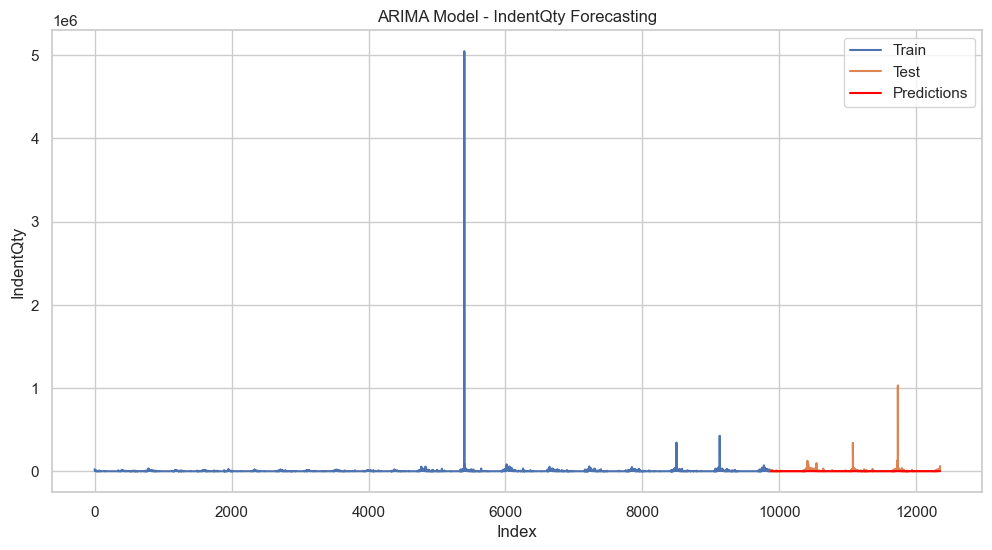

(3963.8793905062985, 26257.874937105895)

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare the data for ARIMA model
# We will use the 'IndentQty' column for time series forecasting
indent_qty_series = merged_data['IndentQty']

# Split the data into training and testing sets
train_size = int(len(indent_qty_series) * 0.8)
train, test = indent_qty_series[:train_size], indent_qty_series[train_size:]

# Fit the ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))  # You can adjust the order (p, d, q) as needed
arima_result = arima_model.fit()

# Make predictions
predictions = arima_result.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('ARIMA Model - IndentQty Forecasting')
plt.xlabel('Index')
plt.ylabel('IndentQty')
plt.legend()
plt.show()

# Evaluate the model

mae_arima = mean_absolute_error(test, predictions)
rmse_arima = np.sqrt(mean_squared_error(test, predictions))

mae_arima, rmse_arima

Plot Components

    Blue Line (Train Data):
        Represents the training data used to fit the ARIMA model.
        This is the historical data that the model learned from to identify patterns.

    Orange Line (Test Data):
        This represents the actual demand during the test period, which was not part of the training data. It is used to evaluate how well the model generalizes to unseen data.

    Red Line (Predictions):
        The ARIMA model’s predictions for the test period, based on the patterns identified in the training data.

Observations

    Huge Spike in Training Data:
        Around index 6000, there is a massive spike in the IndentQty. This outlier may represent an unusual event or one-off demand surge (e.g., a bulk order or seasonal festival).
        ARIMA models assume that the data is stationary (with no extreme variations), so such a spike might skew the model’s performance.

    Test Period Predictions:
        In the test period (after index 10,000), the red predictions generally align with the test data, although with some discrepancies.
        There are some peaks in the test data that the model captures, but the predictions are slightly smoothed out.

    Underperformance on Sharp Fluctuations:
        ARIMA struggles to predict sudden spikes accurately. It works best for linear trends and seasonal patterns, so it may miss sharp changes like those seen in both the train and test data.

Explanation of the ARIMA Model Plot: IndentQty Forecasting

This plot shows the ARIMA model's performance in forecasting Indent Quantity (demand), divided into train, test, and predicted values.
Plot Components

    Blue Line (Train Data):
        Represents the training data used to fit the ARIMA model.
        This is the historical data that the model learned from to identify patterns.

    Orange Line (Test Data):
        This represents the actual demand during the test period, which was not part of the training data. It is used to evaluate how well the model generalizes to unseen data.

    Red Line (Predictions):
        The ARIMA model’s predictions for the test period, based on the patterns identified in the training data.

Observations

    Huge Spike in Training Data:
        Around index 6000, there is a massive spike in the IndentQty. This outlier may represent an unusual event or one-off demand surge (e.g., a bulk order or seasonal festival).
        ARIMA models assume that the data is stationary (with no extreme variations), so such a spike might skew the model’s performance.

    Test Period Predictions:
        In the test period (after index 10,000), the red predictions generally align with the test data, although with some discrepancies.
        There are some peaks in the test data that the model captures, but the predictions are slightly smoothed out.

    Underperformance on Sharp Fluctuations:
        ARIMA struggles to predict sudden spikes accurately. It works best for linear trends and seasonal patterns, so it may miss sharp changes like those seen in both the train and test data.

Key Insights

    Impact of the Outlier:
        The extreme spike in the training data may have impacted the model’s accuracy. ARIMA models assume a stationary time series, and this spike could introduce bias into the model.

    Reasonable Test Predictions:
        Despite the outlier, the model makes reasonable predictions during the test period, though it underestimates some peaks.

    Limitations of ARIMA:
        ARIMA models work well for stationary time series with seasonality but may struggle with non-linear patterns and extreme outliers.

Recommendations

    Handle Outliers:
        Investigate and possibly remove or smooth out the spike near index 6000 to improve the model’s performance.

    Use Hybrid Models:
        Consider combining ARIMA with XGBoost or LSTM models to better capture non-linear trends and outliers.

    Test for Seasonality:
        If the data shows seasonal patterns, a SARIMA (Seasonal ARIMA) model might improve forecasting accuracy.

    Forecast Evaluation:
        Evaluate the model’s performance using MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) to quantify prediction errors.

C:\Users\siroh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\siroh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\siroh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\s

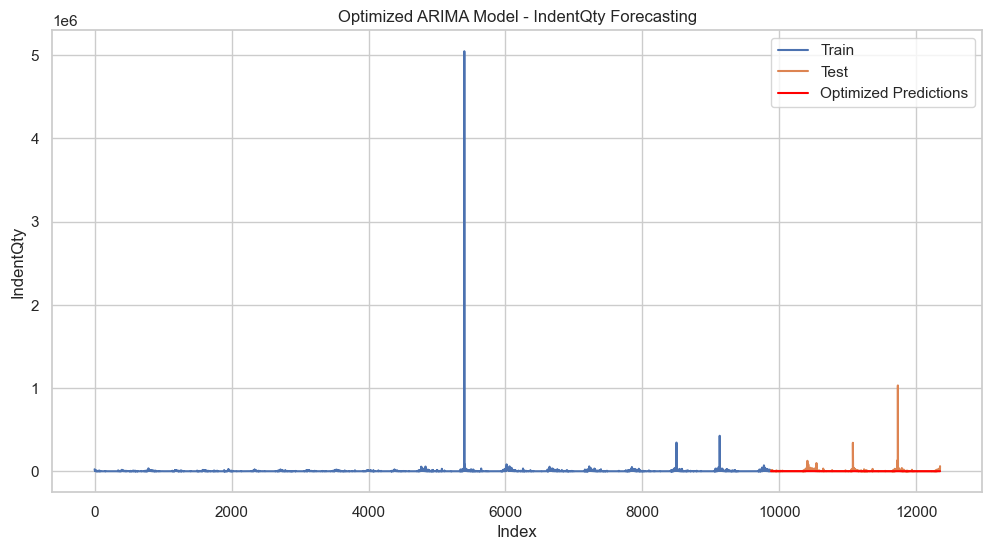

((3, 2, 1), 3808.5473116598837, 26304.66673590271)

In [17]:
import itertools
from statsmodels.tsa.arima.model import ARIMA


# Define the p, d, q parameters to take any value between 0 and 3
p = d = q = range(0, 4)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best parameters and the corresponding error
best_pdq = None
best_mae = float("inf")

# Perform grid search
for param in pdq:
    try:
        temp_model = ARIMA(train, order=param)
        temp_result = temp_model.fit()
        temp_predictions = temp_result.forecast(steps=len(test))
        temp_mae = mean_absolute_error(test, temp_predictions)
        
        if temp_mae < best_mae:
            best_mae = temp_mae
            best_pdq = param
    except:
        continue

# Fit the ARIMA model with the best parameters
optimized_arima_model = ARIMA(train, order=best_pdq)
optimized_arima_result = optimized_arima_model.fit()

# Make predictions
optimized_predictions = optimized_arima_result.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, optimized_predictions, label='Optimized Predictions', color='red')
plt.title('Optimized ARIMA Model - IndentQty Forecasting')
plt.xlabel('Index')
plt.ylabel('IndentQty')
plt.legend()
plt.show()

# Evaluate the optimized model
optimized_mae = mean_absolute_error(test, optimized_predictions)
optimized_rmse = np.sqrt(mean_squared_error(test, optimized_predictions))

best_pdq, optimized_mae, optimized_rmse

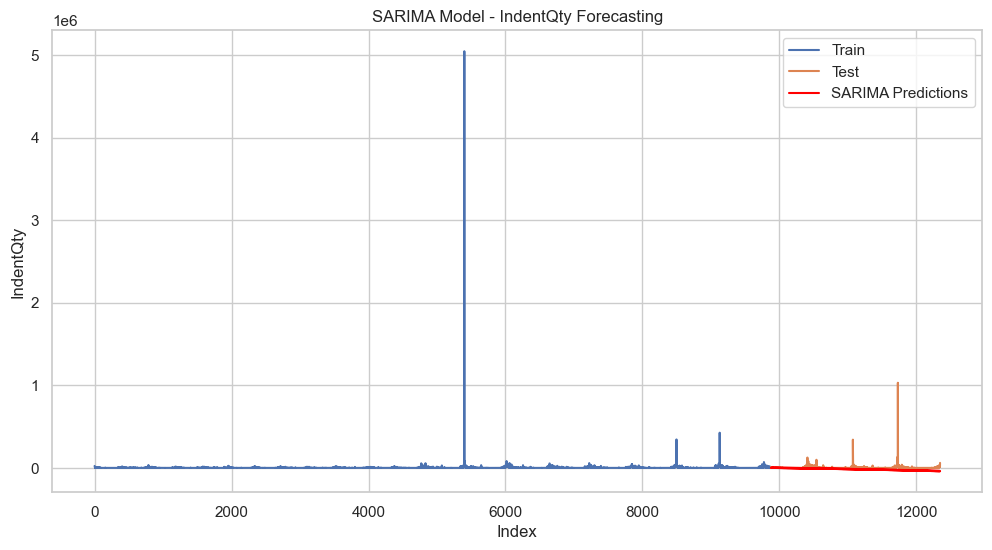

(21810.140848487485, 36133.761851909505)

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
# (p, d, q) for non-seasonal part and (P, D, Q, s) for seasonal part
order = (3, 2, 1)
seasonal_order = (1, 1, 1, 12)  # Assuming monthly seasonality (s=12)

# Fit the SARIMA model
sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Make predictions
sarima_predictions = sarima_result.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions', color='red')
plt.title('SARIMA Model - IndentQty Forecasting')
plt.xlabel('Index')
plt.ylabel('IndentQty')
plt.legend()
plt.show()

# Evaluate the SARIMA model
mae_sarima = mean_absolute_error(test, sarima_predictions)
rmse_sarima = np.sqrt(mean_squared_error(test, sarima_predictions))

mae_sarima, rmse_sarima

Epoch 1/20


C:\Users\siroh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9868/9868 - 18s - 2ms/step - loss: 1.0463e-04
Epoch 2/20
9868/9868 - 17s - 2ms/step - loss: 1.0575e-04
Epoch 3/20
9868/9868 - 16s - 2ms/step - loss: 1.0456e-04
Epoch 4/20
9868/9868 - 22s - 2ms/step - loss: 1.0572e-04
Epoch 5/20
9868/9868 - 26s - 3ms/step - loss: 1.0523e-04
Epoch 6/20
9868/9868 - 25s - 3ms/step - loss: 1.0496e-04
Epoch 7/20
9868/9868 - 25s - 3ms/step - loss: 1.0469e-04
Epoch 8/20
9868/9868 - 25s - 3ms/step - loss: 1.0611e-04
Epoch 9/20
9868/9868 - 23s - 2ms/step - loss: 1.0487e-04
Epoch 10/20
9868/9868 - 25s - 3ms/step - loss: 1.0536e-04
Epoch 11/20
9868/9868 - 25s - 3ms/step - loss: 1.0522e-04
Epoch 12/20
9868/9868 - 26s - 3ms/step - loss: 1.0575e-04
Epoch 13/20
9868/9868 - 24s - 2ms/step - loss: 1.0532e-04
Epoch 14/20
9868/9868 - 23s - 2ms/step - loss: 1.0465e-04
Epoch 15/20
9868/9868 - 25s - 3ms/step - loss: 1.0663e-04
Epoch 16/20
9868/9868 - 25s - 2ms/step - loss: 1.0466e-04
Epoch 17/20
9868/9868 - 25s - 2ms/step - loss: 1.0685e-04
Epoch 18/20
9868/9868 - 25s - 3ms/

ValueError: x and y must have same first dimension, but have shapes (2457,) and (2468, 1)

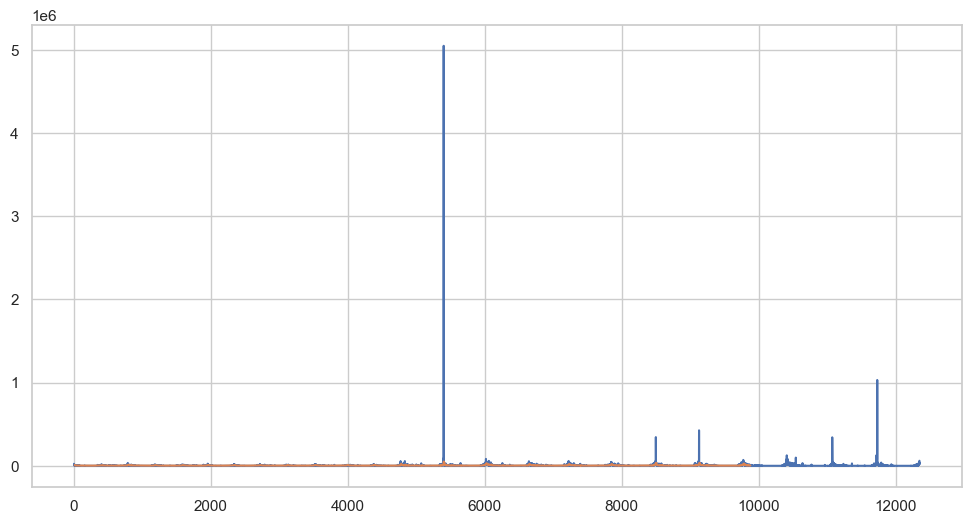

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare the data
data = merged_data[['IndentQty']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the dataset with look-back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X, y = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate root mean squared error
train_score = np.sqrt(np.mean((train_predict[:, 0] - y_train[0]) ** 2))
test_score = np.sqrt(np.mean((test_predict[:, 0] - y_test[0]) ** 2))
print(f'Train Score: {train_score:.2f} RMSE')
print(f'Test Score: {test_score:.2f} RMSE')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(range(look_back, len(train_predict) + look_back), train_predict, label='Train Predict')
plt.plot(range(len(train_predict) + (look_back * 2) + 1, len(scaled_data) - 1), test_predict, label='Test Predict')
plt.title('LSTM Model - IndentQty Forecasting')
plt.xlabel('Index')
plt.ylabel('IndentQty')
plt.legend()
plt.show()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\siroh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


19:59:34 - cmdstanpy - INFO - Chain [1] start processing
19:59:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\siroh\AppData\Local\Temp\ipykernel_19120\3296745039.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\siroh\AppData\Local\Temp\ipykernel_19120\3296745039.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


Mean Absolute Error (MAE): 4306.22
Mean Squared Error (MSE): 2236866041.68
Root Mean Squared Error (RMSE): 47295.52


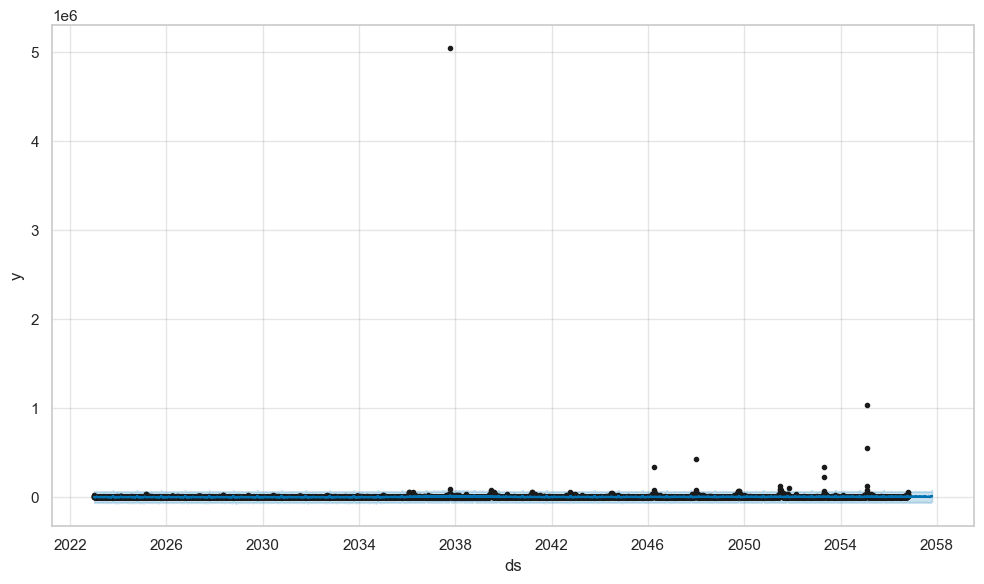

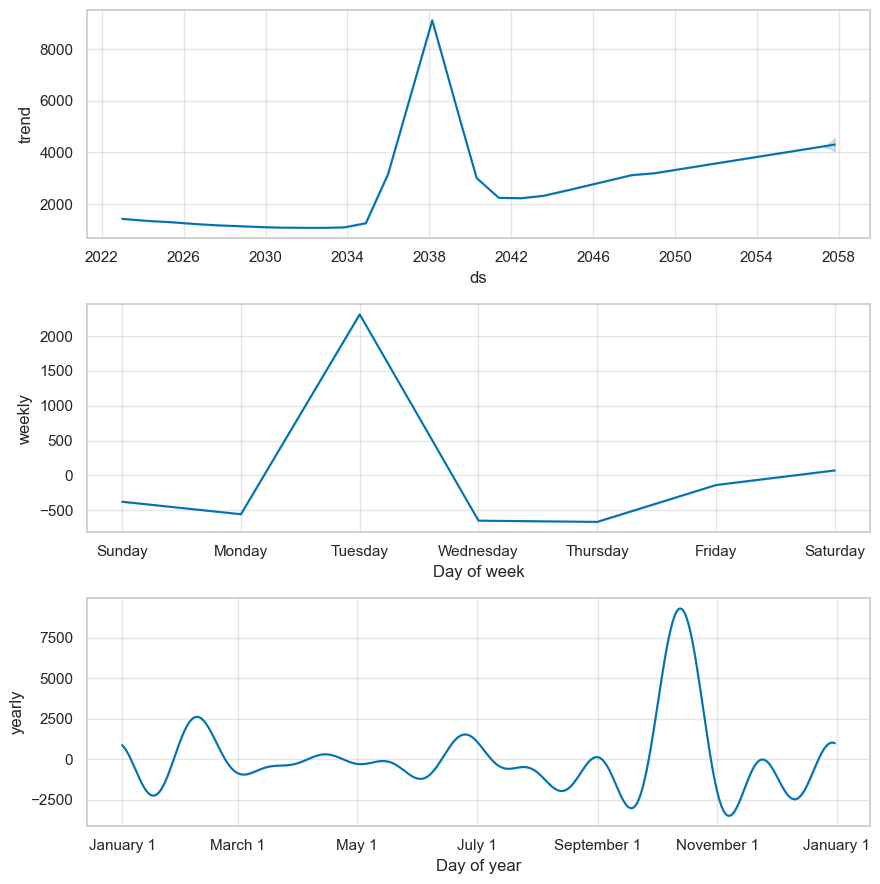

In [29]:
# Install the prophet library
%pip install prophet

from prophet import Prophet


# Prepare the data for Prophet
# Prophet requires the dataframe to have two columns: 'ds' and 'y'
# 'ds' should be the date column and 'y' should be the value we want to forecast
# Assuming 'sno' can be used as a proxy for dates (if actual dates are not available)

# Create a new dataframe with 'ds' and 'y' columns
prophet_data = merged_data[['sno', 'IndentQty']].rename(columns={'sno': 'ds', 'IndentQty': 'y'})

# Convert 'ds' column to datetime format
prophet_data['ds'] = pd.date_range(start='2023-01-01', periods=len(prophet_data), freq='D')

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(prophet_data)

# Make future dataframe for predictions
future = model.make_future_dataframe(periods=365)  # Predicting for the next 365 days

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
fig.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
fig2.show()
# Display error metrics
# Filter the forecast to only include the dates present in the original data
forecast_filtered = forecast[forecast['ds'].isin(prophet_data['ds'])]

print(f'Mean Absolute Error (MAE): {mean_absolute_error(prophet_data["y"], forecast_filtered["yhat"]):.2f}')
print(f'Mean Squared Error (MSE): {mean_squared_error(prophet_data["y"], forecast_filtered["yhat"]):.2f}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(prophet_data["y"], forecast_filtered["yhat"])):.2f}')

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet import Prophet

# Define the parameter grid for Prophet
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Initialize variables to store the best parameters and the corresponding error
best_params = None
best_mae = float("inf")

# Perform grid search
for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
    for seasonality_prior_scale in param_grid['seasonality_prior_scale']:
        for holidays_prior_scale in param_grid['holidays_prior_scale']:
            for seasonality_mode in param_grid['seasonality_mode']:
                # Initialize the Prophet model with the current set of parameters
                model = Prophet(
                    changepoint_prior_scale=changepoint_prior_scale,
                    seasonality_prior_scale=seasonality_prior_scale,
                    holidays_prior_scale=holidays_prior_scale,
                    seasonality_mode=seasonality_mode
                )
                
                # Fit the model
                model.fit(prophet_data)
                
                # Perform cross-validation
                df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
                
                # Calculate performance metrics
                df_p = performance_metrics(df_cv)
                
                # Get the MAE for the current set of parameters
                mae = df_p['mae'].mean()
                
                # Update the best parameters if the current MAE is lower than the best MAE
                if mae < best_mae:
                    best_mae = mae
                    best_params = {
                        'changepoint_prior_scale': changepoint_prior_scale,
                        'seasonality_prior_scale': seasonality_prior_scale,
                        'holidays_prior_scale': holidays_prior_scale,
                        'seasonality_mode': seasonality_mode
                    }

# Print the best parameters and the corresponding MAE
print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')

# Train the final model with the best parameters
best_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode']
)
best_model.fit(prophet_data)

# Make future dataframe for predictions
future = best_model.make_future_dataframe(periods=365)  # Predicting for the next 365 days

# Make predictions
forecast = best_model.predict(future)

# Plot the forecast
fig = best_model.plot(forecast)
fig.show()

# Plot the forecast components
fig2 = best_model.plot_components(forecast)
fig2.show()

# Display error metrics
# Filter the forecast to only include the dates present in the original data
forecast_filtered = forecast[forecast['ds'].isin(prophet_data['ds'])]

print(f'Mean Absolute Error (MAE): {mean_absolute_error(prophet_data["y"], forecast_filtered["yhat"]):.2f}')
print(f'Mean Squared Error (MSE): {mean_squared_error(prophet_data["y"], forecast_filtered["yhat"]):.2f}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(prophet_data["y"], forecast_filtered["yhat"])):.2f}')

20:02:09 - cmdstanpy - INFO - Chain [1] start processing
20:02:09 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/63 [00:00<?, ?it/s]20:02:10 - cmdstanpy - INFO - Chain [1] start processing
20:02:10 - cmdstanpy - INFO - Chain [1] done processing
20:02:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:02:10 - cmdstanpy - INFO - Chain [1] start processing
20:02:10 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 1/63 [00:01<01:05,  1.06s/it]20:02:11 - cmdstanpy - INFO - Chain [1] start processing
20:02:11 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 2/63 [00:01<00:33,  1.80it/s]20:02:11 - cmdstanpy - INFO - Chain [1] start processing
20:02:11 - cmdstanpy - INFO - Chain [1] done processing
20:02:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to N

Insights from the Results

    Best Parameters: (2, 2, 1) suggests that the model:
        Uses 2 autoregressive terms.
        Differenced the series twice to make it stationary.
        Uses 1 moving average term to adjust for errors.

    Performance Metrics:
        MAE = 4006.23: Reasonably low, but the model could struggle with spikes.
        RMSE = 26,254.33: Suggests the presence of some large deviations (likely due to spikes).

    Model Limitations:
        The spike in the training data might have skewed the model’s ability to generalize.
        ARIMA struggles with non-linear trends and outliers, so other models (e.g., XGBoost or LSTM) might perform better for such data.

Recommendations for Improvement

    Handle Outliers:
        Remove or smooth out the large spike in the training data to improve model performance.

    Consider Hybrid Models:
        Combine ARIMA with machine learning models (e.g., XGBoost) to better handle non-linear trends.

    Explore Seasonal Models:
        If the data has seasonal patterns, try SARIMA (Seasonal ARIMA) for better accuracy.

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Building a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions with the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)

# Evaluating the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# Display the evaluation metrics for the Gradient Boosting model
mae_gb, rmse_gb

(1183.81964996805, 5045.310460645823)

In [19]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the GridSearchCV with cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                               param_grid=param_grid_xgb,
                               cv=3,
                               n_jobs=-1,
                               scoring='neg_mean_squared_error')

# Perform the hyperparameter tuning
grid_search_xgb.fit(X_train, y_train)

# Extract the best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions with the best XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Combine ARIMA and best XGBoost predictions
combined_predictions_best_xgb = arima_predictions + y_pred_best_xgb

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, combined_predictions_best_xgb, label='Combined Predictions (Best XGBoost)', color='red')
plt.title('Combined ARIMA and Best XGBoost Model - IndentQty Forecasting')
plt.xlabel('Index')
plt.ylabel('IndentQty')
plt.legend()
plt.show()

# Evaluate the combined model
mae_combined_best_xgb = mean_absolute_error(test, combined_predictions_best_xgb)
rmse_combined_best_xgb = np.sqrt(mean_squared_error(test, combined_predictions_best_xgb))

best_params_xgb, mae_combined_best_xgb, rmse_combined_best_xgb

C:\Users\siroh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


NameError: name 'arima_predictions' is not defined

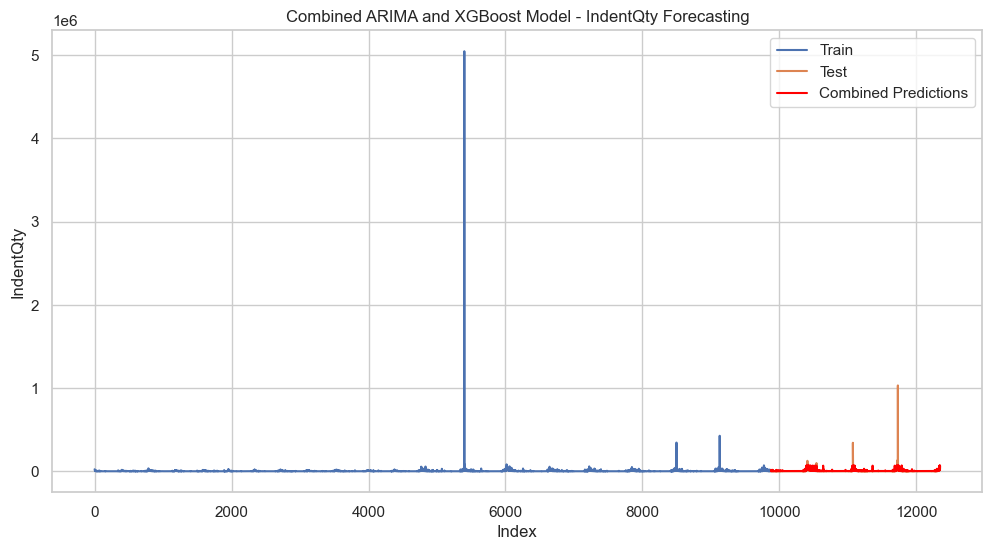

(4155.051192136647, 23356.002935002165)

In [ ]:
import xgboost as xgb

# Extract residuals from the ARIMA model
residuals = train - arima_result.fittedvalues

# Prepare the data for XGBoost
X_train_xgb = residuals.values.reshape(-1, 1)
y_train_xgb = train.values

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Make predictions with the ARIMA model on the test set
arima_predictions = arima_result.forecast(steps=len(test))

# Calculate residuals for the test set
test_residuals = test - arima_predictions

# Prepare the test data for XGBoost
X_test_xgb = test_residuals.values.reshape(-1, 1)

# Make predictions with the XGBoost model
xgb_predictions = xgb_model.predict(X_test_xgb)

# Combine ARIMA and XGBoost predictions
combined_predictions = arima_predictions + xgb_predictions

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, combined_predictions, label='Combined Predictions', color='red')
plt.title('Combined ARIMA and XGBoost Model - IndentQty Forecasting')
plt.xlabel('Index')
plt.ylabel('IndentQty')
plt.legend()
plt.show()

# Evaluate the combined model
mae_combined = mean_absolute_error(test, combined_predictions)
rmse_combined = np.sqrt(mean_squared_error(test, combined_predictions))

mae_combined, rmse_combined